**What is this PGMP_v1?**

PGMP_v1 is an online tool hosted on Google Colab that predict the peroxisome proliferator-activated receptor gamma (PPAR-gamma) modulatory property (1 = Active, 0 = Inactive) of a small molecule and also visualize the molecule.

PGMP stands fro **P**PAR-**G**amma **M**odulator(s) **P**redictor.

This Google Colab notebook is a supplementary material of the paper "PPARg Predictor" (link here) and we encourage you to read it before using this pipeline.

---
Please follow these three steps before running this notebook.

1: Download the Folder named "PGMP_v1_datasets" from https://drive.google.com/drive/folders/1jL34B1yuN6UlADfpmmMXDW7WFXBqlW6S?usp=sharing.

2: Upload this folder in your Google Drive.

3: Confirm the presence train and test sets in that folder.

---
Example Smiles:
1. PPAR-g Inactive/CHEMBL465746: COc1ccc(NC(=S)NS(=O)(=O)c2ccc(CCNS(=O)(=O)c3ccccc3)cc2)cc1
2. Known PPAR-g Active/CHEMBL3695901: Cc1c(C)n(Cc2ccc(-c3ccccc3)cc2)c2ccc(C(=O)NC(C)(C)c3ccc(Br)cc3)cc12
3. Imatinib: Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc(-c2cccnc2)n1

---
Bugs: If you encounter any bugs, please report the issue to my mail id pharmacist.amin@gmail.com or askabdul@unisa.it

In [1]:
#@title ##1. Install and import required packages.
%%capture

# TOPIC : 		PPAR-gamma Predictor
# TITLE : 		Prediction of external molecule contains SMILES
# AUTHOR: 	  Dr. Sk. Abdul Amin

# Bugs: If you encounter any bugs, please report the issue to my mail id askabdul@unisa.it

# Import the necessary libraries
from google.colab import drive
drive.mount('/content/drive/')

!pip install rdkit-pypi
!pip install optuna
!pip install mordred rdkit pandas

# Required imports
import pandas as pd
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Draw
import os
from mordred import Calculator, descriptors
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("Grazie")

This installation may take one minute. Thank you for your patience!


### Thank you for using PGMP_v1 (Amin et al., 2024) ###

Random forest model is developed.
Accuracy of the external set: 0.8583

### Mordred descriptor calculation is in progress ###


100%|██████████| 1/1 [00:00<00:00,  1.78it/s]



####A#M#I#N#****** Here is the result ******#A#M#I#N####


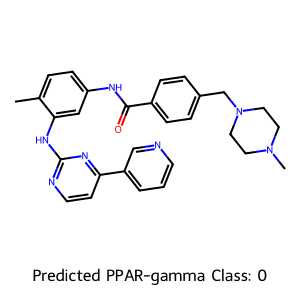


NOTE: 1 = Active modulator, 0 = Inactive modulator

###A#M#I#N# Donot forgot to cite PGMP_v1. Grazie! #A#M#I#N###


In [2]:
#@title ##2. Please, provide the necessary input files below:

# @markdown Upload the train and test sets:

# List of SMILES strings
Smiles = "Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc(-c2cccnc2)n1" #@param {type:"string"}

smiles_list = [
    Smiles  # Updated SMILES string
]

Your_Google_Drive_Path = '/content/drive/MyDrive/PGMP_v1_datasets' #@param {type:"string"}
workDir = Your_Google_Drive_Path

#train_set = 'PGMPv1_Train.csv' #@param {type:"string"}
#test_set = 'PGMPv1_Test.csv' #@param {type:"string"}

train_set = 'PGMPv1_Train.csv'
test_set = 'PGMPv1_Test.csv'

train_set1 = os.path.join(workDir, str(train_set))
test_set1 = os.path.join(workDir, str(test_set))

train_data = pd.read_csv(train_set1, sep=',')
test_data = pd.read_csv(test_set1, sep=',')

# Define descriptor and target columns
descriptor_columns = ['BCUTi-1l', 'BCUTm-1l', 'BCUTc-1l', 'BCUTs-1l',
       'BCUTd-1h', 'SlogP_VSA2', 'SpMax_A', 'TopoPSA(NO)', 'BCUTpe-1l',
       'BCUTi-1h', 'BCUTse-1l', 'Xch-6dv', 'BCUTZ-1l', 'MID_O', 'BCUTare-1l',
       'TopoPSA', 'Xch-6d', 'VR3_D', 'PEOE_VSA1', 'MID_N', 'Xch-7d',
       'BCUTv-1h', 'SMR_VSA7', 'Xc-5d', 'SlogP_VSA3', 'VR3_Dzare', 'BCUTp-1h',
       'BCUTdv-1h', 'VR3_Dzpe', 'SRW09', 'BCUTp-1l', 'VR3_Dzse', 'Xch-5dv',
       'piPC3', 'SlogP_VSA6', 'PEOE_VSA8', 'VR3_Dzi', 'VE1_Dzm', 'Xc-5dv',
       'BCUTd-1l', 'VE2_Dzm', 'BCUTse-1h', 'VE1_DzZ', 'HybRatio', 'VE2_DzZ',
       'GGI3', 'nBondsA', 'BCUTare-1h', 'VR3_Dzv', 'BCUTdv-1l']
target_column = 'pIC50_binary'

# Ensure no missing values in the descriptor or target columns
train_data = train_data.dropna(subset=descriptor_columns + [target_column])
test_data = test_data.dropna(subset=descriptor_columns + [target_column])

# Split the data into features and target
X_train = train_data[descriptor_columns]
y_train = train_data[target_column]
X_test = test_data[descriptor_columns]
y_test = test_data[target_column]

# Optimize hyperparameters with Optuna
# Assume `study` is already defined and trials have been completed
best_params = {
    'n_estimators': 62,  # Replace with your actual best params from the Optuna study
    'max_depth': 32,
    'min_samples_split': 5,
    'min_samples_leaf': 2
}

# Train the model with the best hyperparameters
model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

model.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print("\n### Thank you for using PGMP_v1 (Amin et al., 2024) ###")
#print(f"Accuracy: {train_accuracy:.4f}")
#print(f"Precision: {train_precision:.4f}")
#print(f"Recall: {train_recall:.4f}")
#print(f"F1 Score: {train_f1:.4f}")
#print("\nTraining Set Classification Report:")
#print(classification_report(y_train, y_train_pred))

# Calculate metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nRandom forest model is developed.")
print(f"Accuracy of the external set: {test_accuracy:.4f}")
#print(f"Precision: {test_precision:.4f}")
#print(f"Recall: {test_recall:.4f}")
#print(f"F1 Score: {test_f1:.4f}")
#print("\nTest Set Classification Report:")
#print(classification_report(y_test, y_test_pred))

print("\n### Mordred descriptor calculation is in progress ###")
# Initialize the Mordred calculator with all available descriptors
calc = Calculator(descriptors, ignore_3D=True)

# Convert SMILES to RDKit molecules
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# Filter out any failed molecule conversions
molecules = [mol for mol in molecules if mol is not None]

# Calculate descriptors for molecules
descriptor_df = calc.pandas(molecules)

# Define the specific descriptors of interest
descriptor_columns = [
    'BCUTi-1l', 'BCUTm-1l', 'BCUTc-1l', 'BCUTs-1l', 'BCUTd-1h', 'SlogP_VSA2',
    'SpMax_A', 'TopoPSA(NO)', 'BCUTpe-1l', 'BCUTi-1h', 'BCUTse-1l', 'Xch-6dv',
    'BCUTZ-1l', 'MID_O', 'BCUTare-1l', 'TopoPSA', 'Xch-6d', 'VR3_D',
    'PEOE_VSA1', 'MID_N', 'Xch-7d', 'BCUTv-1h', 'SMR_VSA7', 'Xc-5d',
    'SlogP_VSA3', 'VR3_Dzare', 'BCUTp-1h', 'BCUTdv-1h', 'VR3_Dzpe', 'SRW09',
    'BCUTp-1l', 'VR3_Dzse', 'Xch-5dv', 'piPC3', 'SlogP_VSA6', 'PEOE_VSA8',
    'VR3_Dzi', 'VE1_Dzm', 'Xc-5dv', 'BCUTd-1l', 'VE2_Dzm', 'BCUTse-1h',
    'VE1_DzZ', 'HybRatio', 'VE2_DzZ', 'GGI3', 'nBondsA', 'BCUTare-1h',
    'VR3_Dzv', 'BCUTdv-1l'
]

# Filter for the desired descriptors and drop rows with missing values
external_descriptor_df = descriptor_df[descriptor_columns].dropna()

# Extract features for prediction
X_external = external_descriptor_df

# Predict on external data
y_external_pred = model.predict(X_external)

# Add predictions to the DataFrame
external_descriptor_df['Predicted_Class_1'] = y_external_pred

print("\n\n####A#M#I#N#****** Here is the result ******#A#M#I#N####")

molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

from IPython.display import SVG
# Generate the grid image with the prediction labels as legends
img = Draw.MolsToGridImage(
    molecules,
    molsPerRow=1,
    subImgSize=(300, 300),
    legends=[f"Predicted PPAR-gamma Class: {pred}" for pred in y_external_pred],
    useSVG=True
)

# Display the image in Jupyter Notebook
display(img)

print("\nNOTE: 1 = Active modulator, 0 = Inactive modulator")
print("\n###A#M#I#N# Donot forgot to cite PGMP_v1. Grazie! #A#M#I#N###")

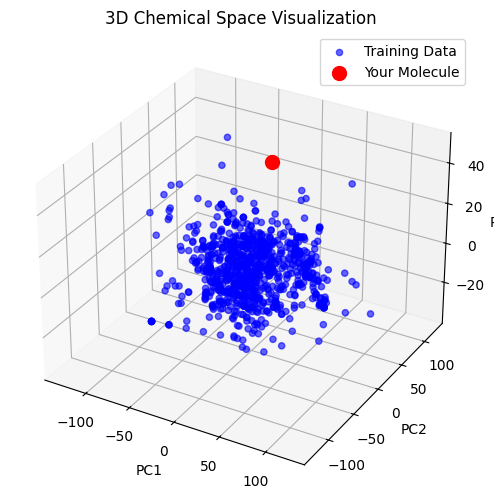


###A#M#I#N# Donot forgot to cite PGMP_v1. Grazie! #A#M#I#N###


In [3]:
#@title ##3. Click below to visualize the Chemical Space

import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from mordred import Calculator, descriptors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Combine the training data and external molecule's descriptors
combined_data = pd.concat([train_data[descriptor_columns], external_descriptor_df], ignore_index=True)

from mpl_toolkits.mplot3d import Axes3D

# Using PCA for 3D projection
pca_3d = PCA(n_components=3)
pca_3d_result = pca_3d.fit_transform(combined_data.fillna(0))

# Separate PCA results for plotting
train_pca_3d = pca_3d_result[:-1]
external_pca_3d = pca_3d_result[-1]

# 3D plot with a smaller figure size
fig = plt.figure(figsize=(8, 6))  # Smaller size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_pca_3d[:, 0], train_pca_3d[:, 1], train_pca_3d[:, 2], color='blue', alpha=0.6, label='Training Data')
ax.scatter(external_pca_3d[0], external_pca_3d[1], external_pca_3d[2], color='red', s=100, label='Your Molecule')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D Chemical Space Visualization")
ax.legend()
plt.show()


print("\n###A#M#I#N# Donot forgot to cite PGMP_v1. Grazie! #A#M#I#N###")